In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import numpy as np

In [2]:
def prepare_hume_data(path):
    df_facial = pd.read_csv(path, index_col=0)
    df_facial.drop('start', axis=1, inplace=True)
    df_facial.columns = ['hume_anger', 'hume_disgust', 'hume_fear', 'hume_joy', 'hume_sadness', 'hume_surprise', 'hume_neutral', 'start_patch']
    df_facial['start_patch'] = df_facial['start_patch'].astype('int64')
    df_facial = df_facial.groupby('start_patch').mean().reset_index()
    return df_facial
    

In [3]:
def merge_text_hume_data(df_hume, df_fer):
    df_merged = pd.merge(df_hume, df_fer, on=['start_patch'], how='inner').drop('start_patch', axis=1)
    return df_merged

In [4]:
def prepare_fer_data(path):
    df_facial = pd.read_csv(path, index_col=0)
    #df_facial.drop('start', axis=1, inplace=True)
    df_facial.columns = ['fer_anger', 'fer_disgust', 'fer_fear', 'fer_joy', 'fer_sadness', 'fer_surprise', 'fer_neutral', 'start_patch']
    df_facial['start_patch'] = df_facial['start_patch'].astype('int64')
    df_facial = df_facial.groupby('start_patch').mean().reset_index()
    return df_facial
    

In [5]:
def compare_csv_data(df1_name_hume, df2_name):
    # Read the CSV files into pandas DataFrames
    df1 = df1_name_hume
    df2 = df2_name
    
    # Extract the emotion columns from each DataFrame
    hume_emotions = ['hume_anger', 'hume_disgust', 'hume_fear', 'hume_joy', 'hume_sadness', 'hume_surprise', 'hume_neutral']

    fer_emotions = ['fer_anger', 'fer_disgust', 'fer_fear', 'fer_joy', 'fer_sadness', 'fer_surprise', 'fer_neutral']
    
    # # Iterate over the emotion columns and plot the data for each file
    # for emotion in hume_emotions:
    #     plt.figure()
    #     plt.plot(df1['hume_start_patch'], df1[emotion], label= str('hume'))
    #     plt.xlabel('Timestamp')
    #     plt.ylabel('Score')
    #     plt.title('Comparison of ' + emotion)
    #     plt.legend()
    #     plt.show()

    # for emotion in fer_emotions:
    #     plt.figure()
    #     plt.plot(df2['fer_start_patch'], df2[emotion], label= str('fer'))
    #     plt.xlabel('Timestamp')
    #     plt.ylabel('Score')
    #     plt.title('Comparison of ' + emotion)
    #     plt.legend()
    #     plt.show()

    plt.figure()
    plt.plot(df1['start_patch'], df1['hume_anger'], label= str('hume'))
    plt.plot(df2['start_patch'], df2['fer_anger'], label= str('fer'))
    plt.xlabel('Timestamp')
    plt.ylabel('Score')
    plt.title('Comparison of ' + 'Anger')
    plt.legend()
    plt.show()


In [6]:
def get_correlations_with_binary(df, binary_feature, continuous_features, corr_func= pearsonr ):
    df = df.dropna()
    correlation_data = []
    for feature in continuous_features:
        corr, p_value = corr_func(df[feature], df[binary_feature])
        correlation_data.append((feature, corr, p_value))
    
    data = correlation_data
    # Extract feature names, correlations, and p-values
    features = [item[0] for item in data]
    correlations = [item[1] for item in data]
    p_values = [item[2] for item in data]

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the correlations as vertical bars
    ax.bar(features, correlations, color='steelblue')

    # Set the y-axis label
    ax.set_ylabel('Correlation')

    # Add horizontal gridlines
    ax.yaxis.grid(True)

    # Set the title
    ax.set_title('Correlation with Binary Variable')

    # Add error bars representing p-values
    ax.errorbar(features, correlations, yerr=np.abs(correlations), fmt='none', color='black', capsize=5, label='p-value')

    # Add p-values and absolute correlation values as text annotations
    for feature, correlation, p_value in zip(features, correlations, p_values):
        ax.text(feature, 0, f'p={p_value:.2f}', ha='center', va='bottom')
        ax.text(feature, correlation, f'{abs(correlation):.2f}', ha='center', va='top')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Display the plot
    plt.tight_layout()
    plt.show()
    return data

In [7]:
df_hume_1 = prepare_hume_data('../data/hume/processed/Cuban_vocals_afternoon.csv')

In [8]:
df_fer_1 = prepare_fer_data('../data/FER_Output/processed/Cuban_vocals_afternoon.csv')

In [9]:
df_merged = merge_text_hume_data(df_hume_1, df_fer_1)

In [12]:
df_merged.head()

,hume_anger,hume_disgust,hume_fear,hume_joy,hume_sadness,hume_surprise,hume_neutral,fer_anger,fer_disgust,fer_fear,fer_joy,fer_sadness,fer_surprise,fer_neutral
0,0.080229,0.118816,0.136176,0.162982,0.152095,0.092143,0.228988,0.067686,0.001125,0.070315,0.334529,0.175410,0.021016,0.329175
1,0.071581,0.151962,0.163758,0.079768,0.229175,0.084195,0.254804,0.050904,0.000098,0.085481,0.346783,0.243870,0.021987,0.250494
2,0.078854,0.143309,0.152117,0.116091,0.194307,0.089055,0.243884,0.046936,0.000289,0.060309,0.300592,0.259693,0.026629,0.304703
3,0.075519,0.135794,0.155839,0.116950,0.196756,0.088541,0.228531,0.073927,0.000489,0.081842,0.273829,0.267290,0.036310,0.265434
4,0.069351,0.132777,0.140830,0.152588,0.171982,0.091472,0.208141,0.060674,0.000330,0.064093,0.409679,0.204057,0.026334,0.233983


In [13]:
df_merged_corr = df_merged.corr().drop(['hume_anger', 'hume_disgust', 'hume_fear', 'hume_joy', 'hume_sadness', 'hume_surprise', 'hume_neutral'], axis=1)
df_merged_corr = df_merged_corr.drop(['fer_anger', 'fer_disgust', 'fer_fear', 'fer_joy', 'fer_sadness', 'fer_surprise', 'fer_neutral'],axis=0)
df_merged_corr

,fer_anger,fer_disgust,fer_fear,fer_joy,fer_sadness,fer_surprise,fer_neutral
hume_anger,0.513885,0.186533,0.514353,-0.522787,0.245967,0.040254,-0.198914
hume_disgust,-0.145730,-0.191772,-0.018608,-0.033716,0.343858,0.136785,-0.062072
hume_fear,0.187652,0.015640,0.353196,-0.335792,0.491661,0.213772,-0.298314
hume_joy,-0.118766,0.007917,-0.307644,0.267472,-0.432817,-0.162575,0.248102
hume_sadness,0.034175,-0.061894,0.206703,-0.189243,0.407701,0.157316,-0.202668
hume_surprise,0.233750,0.068102,0.038679,-0.129411,0.036900,-0.056137,-0.125285
hume_neutral,0.048196,-0.116089,0.292639,-0.198937,0.202693,0.198697,-0.046140


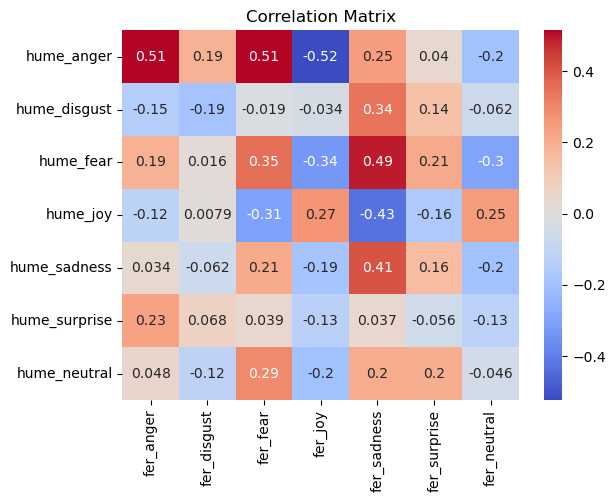

In [14]:
sns.heatmap(df_merged_corr, annot=True, cmap='coolwarm')

# Customize the plot
plt.title('Correlation Matrix')
plt.show()

In [ ]:
compare_csv_data(df_hume_1, df_fer_1)

In [ ]:
df_hume_2 = prepare_hume_data('../data/hume/processed/Cuban_vocals_morning.csv')

In [ ]:
compare_csv_data(df_hume_2, '../data/FER_Output/processed/Cuban_vocals_morning.csv')

In [ ]:
df_hume_3 = prepare_hume_data('../data/hume/processed/Funk_band_morning.csv')

In [ ]:
compare_csv_data(df_hume_3, '../data/FER_Output/processed/Funk_band_morning.csv')

In [ ]:
df_hume_4 = prepare_hume_data('../data/hume/processed/Funk_rhythm_morning.csv')

In [ ]:
compare_csv_data(df_hume_4, '../data/FER_Output/processed/Funk_rhythm_morning.csv')

#### Validation by comparing the max feature for each time slot of 5min

"Ich würde euch raten, dass ihr die am stärksten ausgeprägten Emotionen von Hume AI und FER pro Observation miteinander vergleicht und schaut, in wie vielen Fällen sich die Label gleichen (bzw. ihr könntet auch Abstufungen davon nehmen und schauen, ob z.B. die drei am stärksten ausgeprägten Emotionen bei beiden Modellen pro Observation übereinstimmen). So könntet ihr beispielsweise einen Prozentwert erfassen. Je höher dieser ist, desto mehr Übereinstimmung und daher natürlich desto besser."

In [72]:
def prepare_hume_data(path):
    df_facial = pd.read_csv(path, index_col=0)
    df_facial.drop('start', axis=1, inplace=True)
    df_facial.columns = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral', 'start_patch']
    df_facial['start_patch'] = df_facial['start_patch'].astype('int64')
    df_facial = df_facial.groupby('start_patch').mean().reset_index()
    df_facial = df_facial.drop(columns=['start_patch'])
    return df_facial
    

In [73]:
def prepare_fer_data(path):
    df_facial = pd.read_csv(path, index_col=0)
    #df_facial.drop('start', axis=1, inplace=True)
    df_facial.columns = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral', 'start_patch']
    df_facial['start_patch'] = df_facial['start_patch'].astype('int64')
    df_facial = df_facial.groupby('start_patch').mean().reset_index()
    df_facial = df_facial.drop(columns=['start_patch'])
    return df_facial
    

In [102]:
def aggregate_to_flow_nonflow(df_merged_cleaned):
    flow_emotions = ['joy', 'fear', 'surprise']
    non_flow =['neutral', 'sadness', 'anger']
    #df_merged_cleaned = df_merged.drop(['segment_id', 'start', 'end', 'negative'], axis=1)
    df_merged_cleaned= df_merged_cleaned.dropna(axis=0)
    df_merged_cleaned
    df_merged_cleaned['flow_emotions'] = df_merged_cleaned[flow_emotions].mean(axis=1)
    df_merged_cleaned['non_flow_emotions'] = df_merged_cleaned[non_flow].mean(axis=1)

    return df_merged_cleaned

In [103]:
df_hume_1 = prepare_hume_data('../data/hume/processed/Cuban_vocals_afternoon.csv')
df_fer_1 = prepare_fer_data('../data/FER_Output/processed/Cuban_vocals_afternoon.csv')

In [104]:
df_hume_1_agg = aggregate_to_flow_nonflow(df_hume_1)

df_fer_1_agg = aggregate_to_flow_nonflow(df_fer_1)

In [105]:
df_hume_1_agg

,anger,disgust,fear,joy,sadness,surprise,neutral,flow_emotions,non_flow_emotions
0,0.080229,0.118816,0.136176,0.162982,0.152095,0.092143,0.228988,0.130434,0.153771
1,0.071581,0.151962,0.163758,0.079768,0.229175,0.084195,0.254804,0.109240,0.185186
2,0.078854,0.143309,0.152117,0.116091,0.194307,0.089055,0.243884,0.119088,0.172348
3,0.075519,0.135794,0.155839,0.116950,0.196756,0.088541,0.228531,0.120444,0.166935
4,0.069351,0.132777,0.140830,0.152588,0.171982,0.091472,0.208141,0.128297,0.149825
5,0.068001,0.141486,0.147049,0.132599,0.191068,0.088272,0.204894,0.122640,0.154654
6,0.071049,0.142959,0.154191,0.109874,0.203260,0.088937,0.230114,0.117667,0.168141
7,0.072519,0.139595,0.147143,0.126334,0.190231,0.090443,0.221394,0.121307,0.161381
8,0.070274,0.136851,0.151686,0.124764,0.195577,0.092795,0.206821,0.123082,0.157557
9,0.072091,0.138568,0.160451,0.101854,0.208009,0.092294,0.234104,0.118200,0.171401


In [106]:
df_hume_1_agg = df_hume_1_agg.drop(columns=['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral'])

df_fer_1_agg = df_fer_1_agg.drop(columns=['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral'])

In [107]:
# Create a new dataframe with max score columns
max_scores_df_hume = pd.DataFrame(columns=['Max Score Column in hume'])#, 'Max Score Column in fer', 'Column 3'])

for index, row in df_hume_1_agg.iterrows():
    max_score1 = row.nlargest(1)
    #max_score2 = df_fer_1.loc[index].idxmax()
    
    max_scores_df_hume.loc[index] = max_score1.index

print(max_scores_df_hume)


   Max Score Column in hume
0         non_flow_emotions
1         non_flow_emotions
2         non_flow_emotions
3         non_flow_emotions
4         non_flow_emotions
5         non_flow_emotions
6         non_flow_emotions
7         non_flow_emotions
8         non_flow_emotions
9         non_flow_emotions
10        non_flow_emotions
11        non_flow_emotions
12        non_flow_emotions
13        non_flow_emotions
14        non_flow_emotions
15        non_flow_emotions
16        non_flow_emotions
17        non_flow_emotions
18        non_flow_emotions
19        non_flow_emotions
20        non_flow_emotions
21        non_flow_emotions
22        non_flow_emotions
23        non_flow_emotions
24        non_flow_emotions
25        non_flow_emotions
26        non_flow_emotions
27        non_flow_emotions
28        non_flow_emotions
29        non_flow_emotions
30        non_flow_emotions
31        non_flow_emotions
32        non_flow_emotions


In [108]:
row_array_hume = []

# Iterate over each row in the dataframe
for _, row in max_scores_df_hume.iterrows():
    # Convert the row to a list and append it to the row_array
    row_array_hume.append(row.tolist())

# Print the row_array
print(row_array_hume)

[['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions']]


In [109]:
# Create a new dataframe with max score columns
max_scores_df = pd.DataFrame(columns=['Max Score Column in hume'])#, 'Max Score Column in fer', 'Column 3'])

for index, row in df_fer_1_agg.iterrows():
    max_score1 = row.nlargest(1)
    #max_score2 = df_fer_1.loc[index].idxmax()
    
    max_scores_df.loc[index] = max_score1.index

print(max_scores_df)

   Max Score Column in hume
0         non_flow_emotions
1         non_flow_emotions
2         non_flow_emotions
3         non_flow_emotions
4             flow_emotions
5         non_flow_emotions
6         non_flow_emotions
7         non_flow_emotions
8         non_flow_emotions
9         non_flow_emotions
10        non_flow_emotions
11        non_flow_emotions
12            flow_emotions
13        non_flow_emotions
14        non_flow_emotions
15        non_flow_emotions
16        non_flow_emotions
17        non_flow_emotions
18        non_flow_emotions
19        non_flow_emotions
20        non_flow_emotions
21        non_flow_emotions
22        non_flow_emotions
23        non_flow_emotions
24        non_flow_emotions
25        non_flow_emotions
26        non_flow_emotions
27        non_flow_emotions
28        non_flow_emotions
29        non_flow_emotions
30        non_flow_emotions


In [110]:
row_array = []

# Iterate over each row in the dataframe
for _, row in max_scores_df.iterrows():
    # Convert the row to a list and append it to the row_array
    row_array.append(row.tolist())

# Print the row_array
print(row_array)

[['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions'], ['non_flow_emotions']]


In [111]:
def compare_and_delete(arr1, arr2):
    if len(arr1) > len(arr2):
        del arr1[len(arr2):]
    elif len(arr2) > len(arr1):
        del arr2[len(arr1):]

In [112]:
compare_and_delete(row_array, row_array_hume)

In [113]:
# Assuming 'array1' and 'row_array' are your two arrays

# Check if the length of the arrays is the same
if len(row_array_hume) == len(row_array):
    # Initialize a count variable to keep track of matching elements
    count = 0

    # Iterate over the arrays using zip()
    for element1, element2 in zip(row_array_hume, row_array):
        # Compare the elements from both arrays
        if element1 == element2:
            print(f"Elements match: {element1}")
            count += 1
        else:
            print(f"Elements do not match: {element1} and {element2}")

    # Calculate the percentage of matching elements
    percentage = (count / len(row_array_hume)) * 100
    print(f"Percentage of matching elements: {percentage}%")
else:
    print("Arrays have different lengths.")


Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements do not match: ['non_flow_emotions'] and ['flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements do not match: ['non_flow_emotions'] and ['flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emotions']
Elements match: ['non_flow_emo